In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv('../../../build/src/experiments/data.csv', sep=",")
df

,INDEX:1000:<ulong>,origin_z:1000:<float>,intersect_x:1000:<float>,intersect_y:1000:<float>,idx_x:1000:<float>,idx_y:1000:<float>,value:1000:<float>,time:1000:<float>,gt_intersect_x:1000:<float>,gt_intersect_y:1000:<float>
0,0,-5.000000,4,0,49,0,0.281099,0,10.000000,-5.000000
1,1,-4.990000,4,0,49,0,0.281099,0,9.984293,-4.999975
2,2,-4.980000,4,0,49,0,0.281099,0,9.968584,-4.999901
3,3,-4.970000,4,0,49,0,0.281099,0,9.952877,-4.999778
4,4,-4.960000,4,0,49,0,0.281099,0,9.937169,-4.999605
...,...,...,...,...,...,...,...,...,...,...
995,995,4.950000,1,0,10,0,0.001000,10,9.921463,4.999383
996,996,4.960000,1,0,10,0,0.001000,10,9.937169,4.999605
997,997,4.969999,1,0,10,0,0.001000,10,9.952876,4.999778
998,998,4.980000,1,0,10,0,0.001000,10,9.968583,4.999901


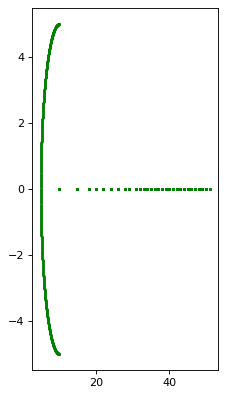

In [63]:
plt.figure(figsize=(3,6), dpi=80)
plt.scatter(x=df["gt_intersect_x:1000:<float>"], y=df["gt_intersect_y:1000:<float>"], s=1, c='green')


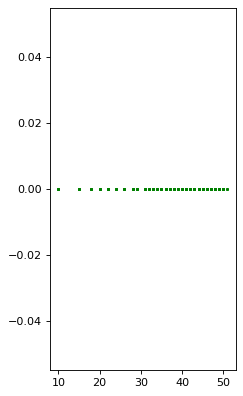

In [64]:
plt.figure(figsize=(3,6), dpi=80)
plt.scatter(x=df["idx_x:1000:<float>"], y=df["idx_y:1000:<float>"], s=1, c='green')

In [60]:
df["intersect_x:1000:<float>"]

0      4
1      4
2      4
3      4
4      4
      ..
995    1
996    1
997    1
998    1
999    1
Name: intersect_x:1000:<float>, Length: 1000, dtype: int64